#### tutorial
- MNIST 
- 손글씨 (0,1,2,3...9)의 손으로 작성한 숫자값을 훈련해 컴퓨터가 0~9 숫자를 판별)
- https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ko

In [1]:
import tensorflow as tf

from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7487860067897940853
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3660578816
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4512997610504207728
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [2]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.0


In [3]:
mnist = tf.keras.datasets.mnist
# Keras에서 제공하는 mnist dataset을 load

(x_train, y_train), (x_test, y_test) = mnist.load_data()  # mnist : npz 넘파이 압축
# x : 사진 데이터, y : 레이블 데이터 
# mnist.load_data[0]() -> (x_train, y_train)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
len(mnist.load_data())

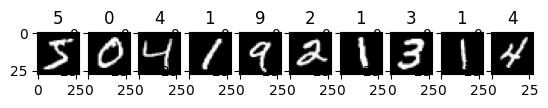

In [10]:
y_train[:3] # 5,0,4

import matplotlib.pyplot as plt
# x_train[0] # 숫자값 5

num=10
for cnt,x in enumerate(x_train[:num]):
    plt.subplot(1,num,cnt+1)
    plt.imshow(x,cmap='gray')
    plt.title(y_train[cnt])

In [12]:
import numpy as np

np.unique(y_train, return_counts=True)
# 전체 데이터의 수 확인

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [13]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
       dtype=int64))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


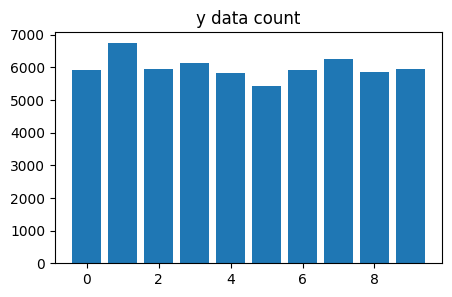

In [18]:
def plot(dataX,dataY,num=10):    
    plt.figure(figsize=(20,20))

    for cnt,x in enumerate(dataX[:num]):
        plt.subplot(1,num,cnt+1)
        plt.imshow(x,cmap='gray')
        plt.title(dataY[cnt])

def count(data):
    tmp=np.unique(data,return_counts=True)
    # or data.values()
    print(tmp)
    plt.figure(figsize=(5,3))
    plt.bar(tmp[0], tmp[1])
    plt.title('y data count')

count(y_train) # 데이터의 편향 확인
# plot(x_train, y_train, 40)

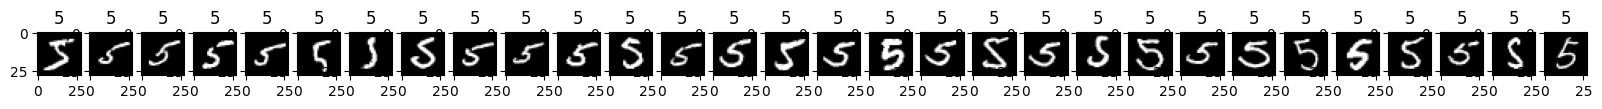

In [22]:
## 숫자 5가 있는 모든 x,y를 별도로 변수 처리
newX=[]
newY=[]
select_num=5

for x,y in zip(x_train, y_train):
    if y == select_num:
        newX.append(x)
        newY.append(y)

len(newY)
plot(newX, newY, 30)

In [23]:
np.shape(x_train), np.shape(y_train)

((60000, 28, 28), (60000,))

### MNIST 특징
- 크기 (28,28)
- 컬러모드(흑백)
- 배경색 검정
- 글자 위치 : 정중앙 
- 숫자값은 0~255를 255로 나눈 값
###### 다음의 요소를 맞춰서 test를 적용해야 함

In [26]:
## 모델 제작

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),  # 28*28의 크기 (즉 x변수가 784개), np.shape(x_train)와 같아야 함, 이에 따라 w 개수가 생성됨
  tf.keras.layers.Dense(128, activation='relu'),  # w가 784개 생성, 그런 경우를 128개로 만듦
  tf.keras.layers.Dropout(0.2),  # (과적합 방지를 위해) 784개의 w가 128개의 경우의 수로 생성 (총 생성되는 w는 784*128개). 이중 20%는 0으로 -> 덜 맞추도록 
  tf.keras.layers.Dense(10, activation='softmax')  # 손글씨 이미지를 0,1,...9의 10개의 숫자 중 어떤 숫자인지 1개 맞추기 
                                                   # np.unique(y_train)의 max 값 + 1
                                                   # input과 output 수는 무조건 맞춰야함
])


# 배치 사이즈, 오차 계산법(경사하강, 오차 역전파 방법), 화면에 보여줄 값 지정 설정 필요
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# 모델 컴파일러에서 모델을 가져와서 순전파 & 역전파 진행
# w, b를 계속 갱신하면서 모든 데이터를 총 에포크만큼 반복
# batch_size 만큼 데이터를 읽어서 오차 계산 및 w,b 갱신 
# (여기서는 6000개의 데이터이며 batch_size를 1000으로 하면 한번에 1000개를 계산)
# 배치가 작을수록 w,b를 많이 갱신하므로 1에포크가 끝나면 결과가 좋음, but 속도는 느림
model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))
# 1875 : 지정된 batch 사이즈로 계산됨
####### 트레이닝 자료를 이용해 w,b를 갱신 - 테스트에는 적용 x
# 일반 accuracy 보다 val_accuracy가 훨씬 유의미한 지표임
# 해당 작업은 맨 마지막 결과(w,b)만 저장함

Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2933 - accuracy: 0.9145 - val_loss: 0.1428 - val_accuracy: 0.9556
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1418 - accuracy: 0.9583 - val_loss: 0.1100 - val_accuracy: 0.9682
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1069 - accuracy: 0.9681 - val_loss: 0.0885 - val_accuracy: 0.9726
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0889 - accuracy: 0.9726 - val_loss: 0.0749 - val_accuracy: 0.9758
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0738 - accuracy: 0.9772 - val_loss: 0.0805 - val_accuracy: 0.9749
Epoch 6/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0671 - accuracy: 0.9783 - val_loss: 0.0758 - val_accuracy: 0.9764
Epoch 7/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0611 - accuracy: 0.9809 - val_loss: 0.0737 - val_accuracy:

In [27]:
model.save('c:/data/myMnist')

INFO:tensorflow:Assets written to: c:/data/myMnist\assets


In [28]:
model.save('c:/data/myMnist.h5') 
# h5 확장자만 필요
# weight 값이 들어가있음
# 전이학습은 h5 파일만 가져와서 사용함